# Support Vector Regression (SVR)

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [5]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [6]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [7]:
y = y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
xsc = StandardScaler() #separate StandardScaler for X and y
ysc = StandardScaler()
X = xsc.fit_transform(X)
y = ysc.fit_transform(y)

In [32]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [33]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [34]:
from sklearn.svm import SVR
regressor = SVR(kernel= 'rbf') # radial basis function
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [35]:
ysc.inverse_transform(regressor.predict(xsc.transform([[6.5]])).reshape(-1,1))   # scale the value for predict using xsc.transform 
                                                                                 # use reshape for formatting error prevention
                                                                                 # inverse_transform the prediction from scaled

array([[170370.0204065]])

## Visualising the SVR results

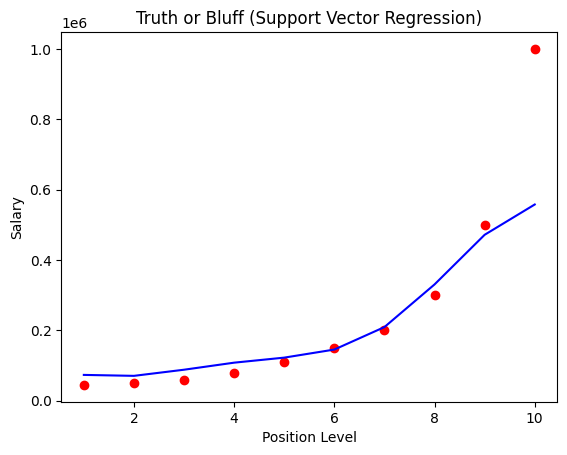

In [36]:
plt.scatter(xsc.inverse_transform(X), ysc.inverse_transform(y), color='red')
plt.plot(xsc.inverse_transform(X), ysc.inverse_transform(regressor.predict(X).reshape(-1,1)), color='blue')
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

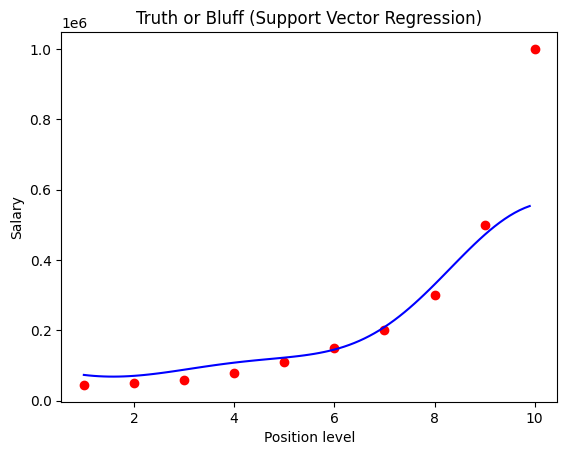

In [41]:
X_grid = np.arange(min(xsc.inverse_transform(X)), max(xsc.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(xsc.inverse_transform(X), ysc.inverse_transform(y), color = 'red')
plt.plot(X_grid, ysc.inverse_transform(regressor.predict(xsc.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (Support Vector Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()